In [12]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 


data=pd.read_csv('/Users/ugur_dura/Desktop/IN2393-Machine Learning for Regulatory Genomics/Project/promoter_sequence_identification/data/parsed_data/train_data.csv')

In [2]:
counts = data['set'].value_counts()
print(counts)

set
train    61731
Name: count, dtype: int64


In [8]:
# define a dictionary to map nucleotides to their one-hot encoded representation
nucleotide_dict = {'A': [1, 0, 0, 0],
                   'C': [0, 1, 0, 0],
                   'G': [0, 0, 1, 0],
                   'T': [0, 0, 0, 1],
                   'N': [0, 0, 0, 0]} # sometimes there are Ns

# define a function to one-hot encode a single DNA sequence
def one_hot_encode(seq):
    return np.array([nucleotide_dict[nuc] for nuc in seq])

# function to load sequences and enhancer activity
def prepare_input(data_set):

  # one-hot encode DNA sequences, apply function
  seq_matrix = np.array(data_set['sequence'].apply(one_hot_encode).tolist())
  print(seq_matrix.shape) # dimensions are (number of sequences, length of sequences, nucleotides)

  # Get output array with dev and hk activities
  Y = data_set['TSS']

  return seq_matrix, Y

In [10]:
X_train, Y_train = prepare_input(data[data['set'] == "train"])
# X_valid, Y_valid = prepare_input(data[data['set'] == "Val"])
# X_test, Y_test = prepare_input(data[data['set'] == "Test"])

(61731, 249, 4)


In [11]:
X_train[0]

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0,

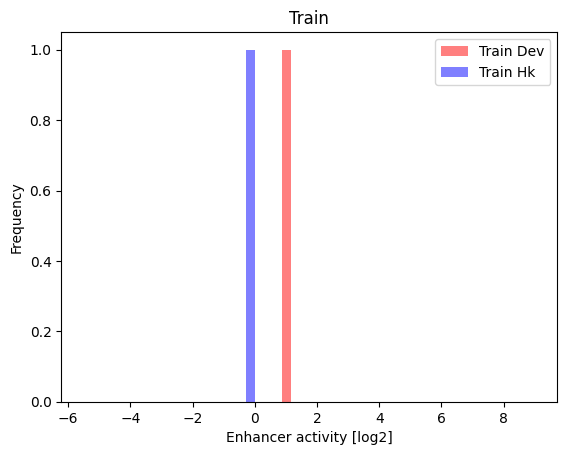

In [13]:
def hist_activities(set, Y):
  
  plt.hist(Y[0], alpha=0.5, bins=50, label=set + ' Dev', color='red', range=[-5.5, 9])
  plt.hist(Y[1], alpha=0.5, bins=50, label=set +' Hk', color='blue', range=[-5.5, 9])

  plt.legend(loc='upper right')
  plt.xlabel('Enhancer activity [log2]')
  plt.ylabel('Frequency')
  plt.title(set)

  plt.show()

hist_activities("Train", Y_train)